In [1]:
import numpy as np
import scipy.integrate

import matplotlib.pyplot as plt

In [2]:
N = 50
alpha = 0.1

In [3]:
def deriv( t, y ):
    
    x = y[:N]
    W = np.reshape( y[N:], (N, N) )
    
    x_dot = np.matmul( W, x )
    W_dot = alpha * ( np.eye( N ) - np.outer( x, x ) )
    
    y_dot = np.zeros( y.shape[0] )
    y_dot[:N] = x_dot
    y_dot[N:] = W_dot.flatten()
    
    return y_dot

In [4]:
t_span = [0, 1e3]
t_eval = np.arange( t_span[0], t_span[-1], 1e-2 )

x0 = np.random.randn( N )
W0 = np.random.randn( N, N )

y0 = np.zeros( (N + N*N,) )
y0[:N] = x0
y0[N:] = W0.flatten()

sol = scipy.integrate.solve_ivp( deriv, t_span, y0,
                                 t_eval = t_eval )

In [5]:
t_star = sol.t
y_star = sol.y

x_star = y_star[:N, :]
W_star = np.reshape( y_star[N:, :], (N, N, y_star.shape[1]) )

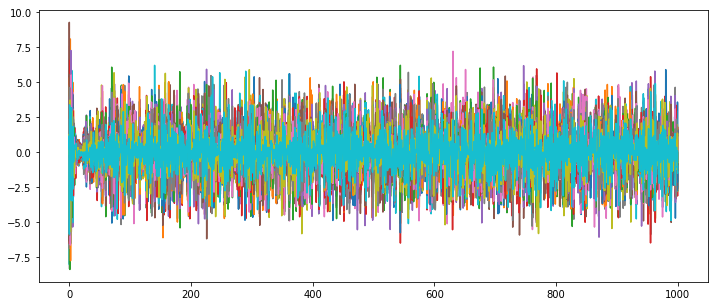

In [6]:
plt.figure( figsize = (12, 5) )
plt.plot( t_star, x_star.T )
#plt.xlim( 0, 100 )
plt.show()

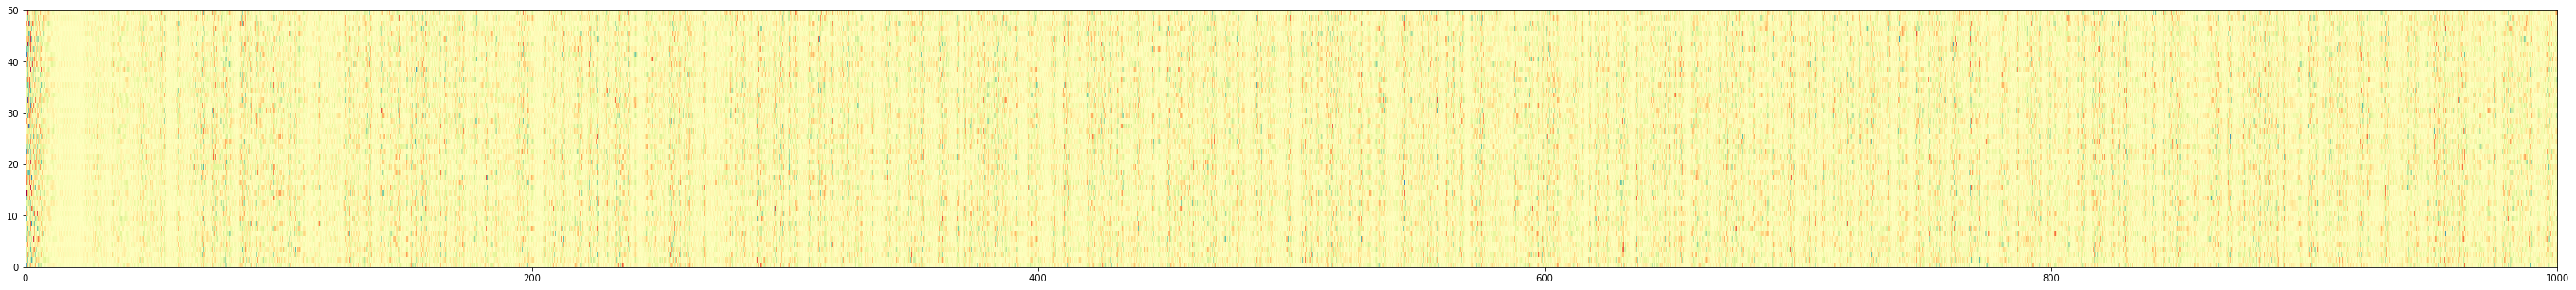

In [7]:
plt.figure( figsize = (48, 5) )
plt.imshow( x_star, aspect = 'auto', cmap = 'Spectral_r',
            extent = (t_star[0], t_star[-1], 0, x_star.shape[0]) )
plt.clim( -8, 8 )

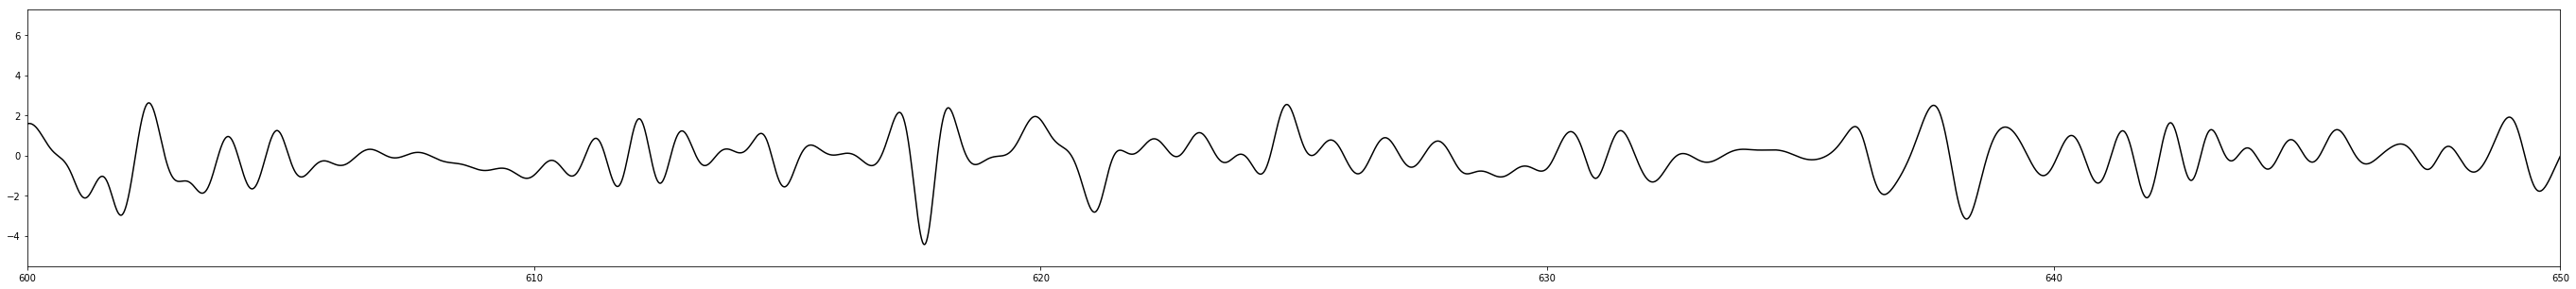

In [13]:
plt.figure( figsize = (48, 5) )
plt.plot( t_star, x_star[0, :], 'k-' )
plt.xlim( 600, 650 )
plt.show()

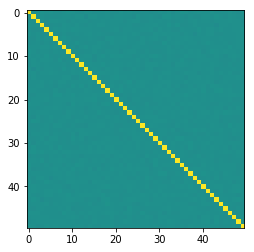

In [9]:
c = np.corrcoef( x_star )
plt.imshow( c )
plt.clim( -1, 1 )

In [10]:
corrs = []
for i in range( c.shape[0] ):
    for j in range( i+1, c.shape[1] ):
        corrs.append( c[i,j] )
corrs = np.array( corrs )

In [12]:
np.median( np.abs( corrs ) )

0.005760179442436588